In [52]:
#import neccessary library 
import numpy as np
import pandas as pd 
import requests 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


<h1 style="text-align: center;">VIETNAMESE DATASET AIR POLUTION 2021</h1>

## **Collect Data**

In [53]:
data = pd.read_csv('historical_air_quality_2021_en.csv')
data.head()

,Station ID,AQI index,Location,Station name,Url,Dominent pollutant,CO,Dew,Humidity,NO2,...,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Data Time Tz,Status,Alert level
0,8767.0,102.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,-,NaN,83.0,-,...,"1,009.00",NaN,102.00,-,27.0,3.6,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
1,8688.0,221.00,"21.0811211,105.8180306","United Nations International School of Hanoi, ...",https://aqicn.org/city/vietnam/hanoi/unis,aqi,-,NaN,77.0,-,...,"1,015.00",NaN,-,-,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
2,8641.0,281.00,"21.0215063,105.8188748","Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",https://aqicn.org/city/vietnam/hanoi/us-embassy,pm25,0.30,NaN,77.0,8.70,...,"1,015.00",NaN,281.00,2.10,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
3,13012.0,36.00,"13.998599,107.996482","Gia Lai/phường Thống Nhất - Pleiku, Vietnam",https://aqicn.org/city/vietnam/gia-lai/phuong-...,pm25,3.00,NaN,60.2,6.00,...,923.70,29.00,36.00,1.00,24.3,1.0,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
4,12488.0,68.00,"16.46226,107.596351","Thừa Thiên Huế/83 Hùng Vương, Vietnam",https://aqicn.org/city/vietnam/thua-thien-hue/...,pm25,2.00,NaN,88.0,-,...,"1,015.00",52.00,68.00,-,21.0,1.0,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?


## **Data Explore**

**The number of rows and columns**

In [54]:
rows, cols = data.shape
rows, cols

(3415, 21)

In [55]:
data.columns

Index(['Station ID', 'AQI index', 'Location', 'Station name', 'Url',
       'Dominent pollutant', 'CO', 'Dew', 'Humidity', 'NO2', 'O3', 'Pressure',
       'PM10', 'PM2.5', 'SO2', 'Temperature', 'Wind', 'Data Time S',
       'Data Time Tz', 'Status', 'Alert level'],
      dtype='object')

**This `Dataset on air quality in Vietnam in 2021` has 3415 rows and 21 columns**


|Column|Meanings
| :------ | ---
| Station ID  | Index
| AQI index  | Air quality index
| Location | Location
| Station name | Name of the station
| Url | Link to Real time AQI
| Dominent pollutant |Dominant Species
| CO | CO Concentration
| Dew | Fog Index
| Humidity | Humidity Index
| NO2 | NO2 Concentration
| O3 | O3 Concentration
| Pressure | Pressure Index
| PM10 | Particulate matter of 10 micrometers or less in diameter
| PM2.5 | Particulate matter of 2.5 micrometers or less in diameter
| SO2 | SO2 Concentration
| Temperature | Temperature Index
| Wind | Wind speed
| Data Time S | Update time
| Data Time Tz | Time zone
| Status | Alert Status
| Alert level | Alert level

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station ID          2622 non-null   float64
 1   AQI index           2618 non-null   object 
 2   Location            2622 non-null   object 
 3   Station name        2622 non-null   object 
 4   Url                 2622 non-null   object 
 5   Dominent pollutant  2114 non-null   object 
 6   CO                  2615 non-null   object 
 7   Dew                 2263 non-null   float64
 8   Humidity            2608 non-null   float64
 9   NO2                 2615 non-null   object 
 10  O3                  2608 non-null   object 
 11  Pressure            2608 non-null   object 
 12  PM10                2583 non-null   object 
 13  PM2.5               2614 non-null   object 
 14  SO2                 2614 non-null   object 
 15  Temperature         2615 non-null   float64
 16  Wind  

## **Preprocessing**

**Convert object to numeric datatypes**

In [57]:
columns = ['AQI index','Dominent pollutant', 'CO', 'NO2', 'O3', 'Pressure',\
       'PM10', 'PM2.5', 'SO2']

In [58]:
data[columns] = data[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [59]:
data.describe()

,Station ID,AQI index,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind
count,2622.000000,2101.000000,2008.000000,2155.000000,2263.000000,2608.000000,1992.000000,1227.000000,2608.000000,1888.000000,2184.000000,1261.000000,2615.000000,2615.000000
mean,11079.826087,6663.874346,22.885956,961.350348,22.248210,75.790529,1350.085341,1022.290139,100350.479294,4540.338983,6324.061355,1467.581285,26.227036,2.922141
std,3548.080424,4701.377106,5.220637,1377.657636,4.256875,16.469530,1223.114050,1108.902307,1908.443486,3516.254299,4571.408248,4084.941581,4.733196,3.886933
min,1584.000000,100.000000,10.000000,10.000000,5.500000,13.000000,100.000000,90.000000,91690.000000,50.000000,50.000000,10.000000,0.500000,0.200000
25%,8767.000000,3200.000000,25.000000,200.000000,20.750000,62.400000,500.000000,200.000000,100200.000000,1975.000000,2975.000000,200.000000,23.000000,2.000000
50%,13012.000000,5800.000000,25.000000,500.000000,22.900000,78.000000,1000.000000,650.000000,100900.000000,4200.000000,5400.000000,500.000000,26.000000,2.800000
75%,13019.000000,9100.000000,25.000000,1000.000000,25.000000,88.500000,1900.000000,1400.000000,101200.000000,6300.000000,9100.000000,1200.000000,29.500000,3.600000
max,13252.000000,34000.000000,25.000000,9800.000000,29.000000,100.000000,8000.000000,9300.000000,102450.000000,34000.000000,31500.000000,50000.000000,39.000000,150.000000


 ##### **Value distribution of Numeric Columns**

In [60]:
df = data.describe()
df = df.append((1 - df.loc['count'].rename('Missing_Ratio')/len(data))*100)
df

C:\Users\Bui Lam\AppData\Local\Temp\ipykernel_9524\2915279914.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append((1 - df.loc['count'].rename('Missing_Ratio')/len(data))*100)


,Station ID,AQI index,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind
count,2622.000000,2101.000000,2008.000000,2155.000000,2263.000000,2608.000000,1992.000000,1227.000000,2608.000000,1888.000000,2184.000000,1261.000000,2615.000000,2615.000000
mean,11079.826087,6663.874346,22.885956,961.350348,22.248210,75.790529,1350.085341,1022.290139,100350.479294,4540.338983,6324.061355,1467.581285,26.227036,2.922141
std,3548.080424,4701.377106,5.220637,1377.657636,4.256875,16.469530,1223.114050,1108.902307,1908.443486,3516.254299,4571.408248,4084.941581,4.733196,3.886933
min,1584.000000,100.000000,10.000000,10.000000,5.500000,13.000000,100.000000,90.000000,91690.000000,50.000000,50.000000,10.000000,0.500000,0.200000
25%,8767.000000,3200.000000,25.000000,200.000000,20.750000,62.400000,500.000000,200.000000,100200.000000,1975.000000,2975.000000,200.000000,23.000000,2.000000
50%,13012.000000,5800.000000,25.000000,500.000000,22.900000,78.000000,1000.000000,650.000000,100900.000000,4200.000000,5400.000000,500.000000,26.000000,2.800000
75%,13019.000000,9100.000000,25.000000,1000.000000,25.000000,88.500000,1900.000000,1400.000000,101200.000000,6300.000000,9100.000000,1200.000000,29.500000,3.600000
max,13252.000000,34000.000000,25.000000,9800.000000,29.000000,100.000000,8000.000000,9300.000000,102450.000000,34000.000000,31500.000000,50000.000000,39.000000,150.000000
Missing_Ratio,23.221083,38.477306,41.200586,36.896047,33.733529,23.631040,41.669107,64.070278,23.631040,44.714495,36.046852,63.074671,23.426061,23.426061


In [61]:
data = data.dropna()

In [62]:
data.describe()

,Station ID,AQI index,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,11398.322394,4276.061776,21.959459,660.231660,21.647876,73.720270,1343.050193,1058.494208,99042.413127,3180.308880,4132.644788,1418.011583,27.014672,2.829923
std,3898.933847,4034.062695,6.036022,982.261209,3.659859,17.310321,1354.418217,999.030115,3282.078670,2959.958162,3931.597457,2666.616911,4.991088,1.485277
min,1584.000000,100.000000,10.000000,100.000000,8.000000,25.000000,100.000000,100.000000,91690.000000,100.000000,100.000000,70.000000,0.500000,0.500000
25%,12958.000000,1400.000000,25.000000,200.000000,19.600000,58.125000,500.000000,200.000000,99522.500000,1200.000000,1300.000000,170.000000,24.000000,2.000000
50%,12976.000000,3200.000000,25.000000,300.000000,22.000000,74.000000,1000.000000,800.000000,100340.000000,2500.000000,2950.000000,900.000000,27.000000,3.000000
75%,13026.000000,6700.000000,25.000000,600.000000,24.000000,88.375000,1300.000000,1475.000000,101000.000000,5300.000000,6675.000000,1600.000000,30.725000,3.600000
max,13251.000000,28500.000000,25.000000,6200.000000,29.000000,100.000000,7300.000000,5000.000000,102450.000000,28500.000000,25500.000000,50000.000000,39.000000,10.800000


### **MODEL PREDICT AQI INDEX**

- The **Air Quality Index (AQI)** is predicted based on the concentration of different air pollutants, including ozone (O3), nitrogen oxide (NOx), carbon monoxide (CO), and fine particulate matter such as PM2.5 and PM10. These concentrations are measured and recorded at air quality monitoring stations and then calculated to generate the AQI.
- The AQI was developed to provide the public with a simple means of understanding and comparing air quality across different areas and to help individuals make informed decisions about protecting their health. The AQI is assessed on a scale of 0 to 500, with higher values indicating more severe levels of pollution.

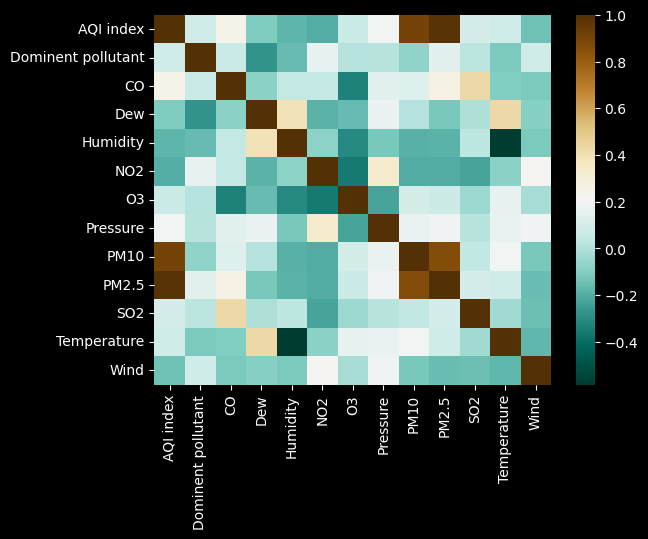

In [63]:
corr = data.drop(columns = ['Station ID']).corr()
sns.heatmap(corr, cmap = "BrBG_r")
plt.show()

We can see that the AQI index is quite dependent on the PM2.5 and PM10 indices. In addition, other air quality indices also have a significant impact on the AQI index.

In [64]:
def draw_BubblePlot(list_attr, name, data):
    plt.xscale(value='log')
    plt.yscale(value='log')
    sns.scatterplot(data=data, x=list_attr[0], y=list_attr[1], size=list_attr[2], sizes=(20, 2000), alpha = 0.5, hue='AQI index', legend=True)
    plt.title(" and ".join(list_attr))
    plt.legend(bbox_to_anchor=(1.01, 1))
    plt.show()

In this data, we use __Linear Regression__ to predict the __AQI Index__: 

* In our __first attempt__, we only used pollution indices related to **PM10 and PM2.5** dust to evaluate the air quality  (AQI).

In [65]:
X = pd.DataFrame(data[['PM10','PM2.5']])
y = pd.DataFrame(data['AQI index'])

We use 75% data for training and 25 % for testing

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
v = pd.DataFrame(regressor.coef_, index = ['Co-efficients']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [69]:
coeff_df = pd.concat([w,v],axis=1, join = 'inner')
coeff_df

,Attribute,Co-efficients
0,PM10,0.206682
1,PM2.5,0.870233


In [70]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred

,Predicted
0,6255.563300
1,2449.378018
2,9516.771224
3,6910.412996
4,1537.809164
...,...
125,1670.519343
126,2121.953170
127,15080.812717
128,2378.672328


In [71]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  241.13457911209537
Mean Square Error:  535532.0320413044
Root Mean Square Error:  15.528508592652914
R2 Score:  0.9654075322194219


- R2 Score of **0.96 indicates** that the model fits the data well and has a very high level of accuracy.As a result, it may be said that the model is trustworthy and useful for making precise predictions.
- We can observe that the model's accuracy for the PM2.5 and PM10 indices is very high, showing that these two particulate matter indices have a significant impact on air quality. These air environment indices must be improved if we want to increase air quality.


##### In our __final attempt__, We used additional air quality indices such as NO2, CO, and O3, along with PM2.5 and PM10, to make predictions the air quality (AQI).






In [72]:
X = pd.DataFrame(data[['PM10','PM2.5','CO','NO2','O3']])
y = pd.DataFrame(data['AQI index'])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [74]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
v = pd.DataFrame(regressor.coef_, index = ['Co-efficients']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [76]:
coeff_df = pd.concat([w,v],axis=1, join = 'inner')
coeff_df

,Attribute,Co-efficients
0,PM10,0.201300
1,PM2.5,0.880289
2,CO,-0.034933
3,NO2,0.061147
4,O3,0.005833


In [77]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred

,Predicted
0,6260.693924
1,2386.151189
2,9494.670729
3,6932.195165
4,1528.210456
...,...
125,1605.764864
126,2080.957317
127,15167.204999
128,2141.309910


In [78]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  257.44342658291197
Mean Square Error:  573885.277407151
Root Mean Square Error:  16.045043676566042
R2 Score:  0.9629301203650058


- The air quality indices in this data do not significantly affect air quality and appear to have somewhat decreased accuracy, but the R2 score of 0.96 still demonstrates that the model fits the data well and has a very high level of accuracy. Consequently, it can be claimed that the model is trustworthy and helpful for making precise forecasts, but it still need improvement.